In [1110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1109]:
pd.set_option('display.max_rows', 1000)

In [1111]:
# The original scraped file of apartment listings from Craigslist Toronto contain inadequate neighborhood data.
# Therefore I wrote another script in Python using the Selenium library to scrape neighborhood info off
# www.latlong.net/Show-Latitude-Longitude.html based on latitude and longitude info provided  
apts = pd.read_csv('toronto_apartments_aug_16_2019_address.csv')

In [283]:
apts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 12 columns):
Unnamed: 0      2998 non-null int64
title           2998 non-null object
listing_url     2998 non-null object
price           2998 non-null int64
time_posted     2998 non-null object
num_bedrooms    2742 non-null float64
sqft            1829 non-null float64
neighborhood    2592 non-null object
latitude        2979 non-null float64
longitude       2979 non-null float64
description     2998 non-null object
address         2979 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 281.1+ KB


In [284]:
apts.head(3)

,Unnamed: 0,title,listing_url,price,time_posted,num_bedrooms,sqft,neighborhood,latitude,longitude,description,address
0,0,Newly renovated modern apartment,https://toronto.craigslist.org/tor/apa/d/west-...,1650,2019-08-16 17:27,1.0,500.0,Toronto,43.651200,-79.482800,\n \nA must see. Newly renovated lower ...,"290 Willard Avenue, Toronto, ON M6S3R2\nToront..."
1,1,Brand New,https://toronto.craigslist.org/tor/apa/d/toron...,2000,2019-08-16 17:10,2.0,NaN,NaN,43.641683,-79.401803,\n \nAn exclusive rental units in a Bra...,"31 Bathurst Street, Toronto, ON M5V2R4\nWaterf..."
2,2,2br - 2bd + 2bath Brand New Never Lived in - N...,https://toronto.craigslist.org/tor/apa/d/toron...,2700,2019-08-16 17:10,2.0,NaN,576 Front St W,43.641538,-79.400577,"\n \nMinto Westside, design-forward con...","Toronto Waterfront Communities-The Island, ON ..."


In [286]:
apts.describe()

,Unnamed: 0,price,num_bedrooms,sqft,latitude,longitude
count,2998.000000,2998.000000,2742.000000,1829.000000,2979.000000,2979.000000
mean,1498.500000,3268.224817,1.716265,1867.533625,43.687846,-79.378219
std,865.592379,18387.534330,0.858304,24451.304516,0.197900,2.095742
min,0.000000,0.000000,1.000000,1.000000,40.980125,-113.693100
25%,749.250000,2000.000000,1.000000,615.000000,43.643554,-79.429614
50%,1498.500000,2500.000000,2.000000,750.000000,43.659713,-79.399500
75%,2247.750000,3100.000000,2.000000,950.000000,43.690722,-79.380324
max,2997.000000,875000.000000,6.000000,700550.000000,51.070800,28.930890


In [1112]:
# Drop 'Unnamed: 0' column 
apts.drop('Unnamed: 0', axis = 1, inplace = True)

In [477]:
apts.columns

Index(['title', 'listing_url', 'price', 'time_posted', 'num_bedrooms', 'sqft',
       'neighborhood', 'latitude', 'longitude', 'description', 'address'],
      dtype='object')

In [ ]:
## Data Cleaning & Feature Engineering

In [1113]:
# check if there is duplicate URLs 
apts['listing_url'].duplicated().sum()

0

In [934]:
# Check out those apartments with CA$0 as listing price 
apts[apts['price'] == 0]

,title,listing_url,price,time_posted,num_bedrooms,sqft,neighborhood,latitude,longitude,description,address
1080,"BUYWITH 10%DOWN, Selfemployed, Low Income, Cas...",https://toronto.craigslist.org/tor/apa/d/buywi...,0,2019-08-10 05:52,NaN,NaN,Canada,NaN,NaN,\n \n****BUY A HOUSE WITH 10%****\n****...,NaN
1892,"BUYWITH 10%DOWN, Selfemployed, Low Income, Cas...",https://toronto.craigslist.org/tor/apa/d/buywi...,0,2019-08-09 23:25,NaN,NaN,Canada,NaN,NaN,\n \n****BUY A HOUSE WITH 10%****\n****...,NaN
2361,"BUYWITH 10%DOWN, Selfemployed, Low Income, Cas...",https://toronto.craigslist.org/tor/apa/d/buywi...,0,2019-08-14 06:23,NaN,NaN,Canada,NaN,NaN,\n \n****BUY A HOUSE WITH 10%****\n****...,NaN
2568,"BUYWITH 10%DOWN, Selfemployed, Low Income, Cas...",https://toronto.craigslist.org/tor/apa/d/buywi...,0,2019-08-15 06:59,NaN,NaN,Canada,NaN,NaN,\n \n****BUY A HOUSE WITH 10%****\n****...,NaN
2798,Charming 1br. Accommodation Alternative Suits ...,https://toronto.craigslist.org/tor/apa/d/toron...,0,2019-08-15 23:11,NaN,NaN,Keele and Bloore,43.6564,-79.458899,\n \nUNIT 5 [Fully Furnished 1 BEDROOM ...,"20 Glen Gordon Road, Toronto, ON M6P1B8\nToron..."
2836,"BUYWITH 10%DOWN, Selfemployed, Low Income, Cas...",https://toronto.craigslist.org/tor/apa/d/buywi...,0,2019-08-16 07:03,NaN,NaN,Canada,NaN,NaN,\n \n****BUY A HOUSE WITH 10%****\n****...,NaN


In [1114]:
# Replace the listing titled "Charming 1br. Accommodation Alternative Suits Keele Subway Line"
# with 2200 as 'price'
apts.loc[apts['title'] == 'Charming 1br. Accommodation Alternative Suits Keele Subway Line', 'price'] = 2200.00

In [1115]:
apts[apts['price'] == 0]

,title,listing_url,price,time_posted,num_bedrooms,sqft,neighborhood,latitude,longitude,description,address
1080,"BUYWITH 10%DOWN, Selfemployed, Low Income, Cas...",https://toronto.craigslist.org/tor/apa/d/buywi...,0.0,2019-08-10 05:52,NaN,NaN,Canada,NaN,NaN,\n \n****BUY A HOUSE WITH 10%****\n****...,NaN
1892,"BUYWITH 10%DOWN, Selfemployed, Low Income, Cas...",https://toronto.craigslist.org/tor/apa/d/buywi...,0.0,2019-08-09 23:25,NaN,NaN,Canada,NaN,NaN,\n \n****BUY A HOUSE WITH 10%****\n****...,NaN
2361,"BUYWITH 10%DOWN, Selfemployed, Low Income, Cas...",https://toronto.craigslist.org/tor/apa/d/buywi...,0.0,2019-08-14 06:23,NaN,NaN,Canada,NaN,NaN,\n \n****BUY A HOUSE WITH 10%****\n****...,NaN
2568,"BUYWITH 10%DOWN, Selfemployed, Low Income, Cas...",https://toronto.craigslist.org/tor/apa/d/buywi...,0.0,2019-08-15 06:59,NaN,NaN,Canada,NaN,NaN,\n \n****BUY A HOUSE WITH 10%****\n****...,NaN
2836,"BUYWITH 10%DOWN, Selfemployed, Low Income, Cas...",https://toronto.craigslist.org/tor/apa/d/buywi...,0.0,2019-08-16 07:03,NaN,NaN,Canada,NaN,NaN,\n \n****BUY A HOUSE WITH 10%****\n****...,NaN


In [1116]:
# Remove those 5 listings above since they are just ads for home purchases, having nothing to do with apartment rental
apts.drop(index = [1080, 1892, 2361, 2568, 2836], axis = 0, inplace = True)

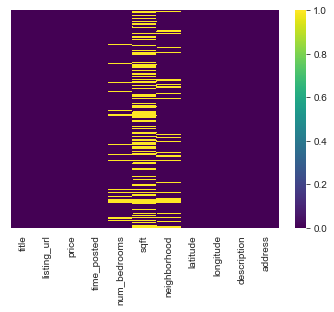

In [1117]:
# Visualize missing data 
sns.heatmap(apts.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')

In [1118]:
apts.isnull().sum()
# Looks like there are still 14 listings with no latitude nor longtitude info provided
# And there are many listings with square ft info missing

title              0
listing_url        0
price              0
time_posted        0
num_bedrooms     251
sqft            1164
neighborhood     406
latitude          14
longitude         14
description        0
address           14
dtype: int64

In [1119]:
# Check neighborhood info 
apts['neighborhood'].value_counts()
# Looks like many 'neighborhood' column values are not actual neighborhoods in Toronto, but street addresses

Toronto                                                         397
16 Bonnycastle St                                                29
Little Italy                                                     25
Davenport/Ossington                                              23
197 Yonge St                                                     21
Scarborough                                                      20
10 York St                                                       20
Brampton                                                         20
Yorkville                                                        19
Entertainment District                                           18
460 Adelaide St E                                                18
88 Harbour St                                                    17
Yonge # Eglinton                                                 16
Mississauga                                                      15
North York                                      

In [1120]:
# Parse out string containing neighborhood info from 'address' column
def get_neighborhood_from_address(x): 
    address = x[0]
    if pd.isnull(address) == False: 
        return address.split('\n')[1]
    
apts['neighborhood_raw'] = apts[['address']].apply(get_neighborhood_from_address, axis = 1)

In [1121]:
apts.head()

,title,listing_url,price,time_posted,num_bedrooms,sqft,neighborhood,latitude,longitude,description,address,neighborhood_raw
0,Newly renovated modern apartment,https://toronto.craigslist.org/tor/apa/d/west-...,1650.0,2019-08-16 17:27,1.0,500.0,Toronto,43.651200,-79.482800,\n \nA must see. Newly renovated lower ...,"290 Willard Avenue, Toronto, ON M6S3R2\nToront...","Toronto, Runnymede-Bloor West Village Toronto ..."
1,Brand New,https://toronto.craigslist.org/tor/apa/d/toron...,2000.0,2019-08-16 17:10,2.0,NaN,NaN,43.641683,-79.401803,\n \nAn exclusive rental units in a Bra...,"31 Bathurst Street, Toronto, ON M5V2R4\nWaterf...","Waterfront Communities-The Island, Toronto, Ni..."
2,2br - 2bd + 2bath Brand New Never Lived in - N...,https://toronto.craigslist.org/tor/apa/d/toron...,2700.0,2019-08-16 17:10,2.0,NaN,576 Front St W,43.641538,-79.400577,"\n \nMinto Westside, design-forward con...","Toronto Waterfront Communities-The Island, ON ...","Waterfront Communities-The Island, Toronto, Do..."
3,2bd + 2bath Brand New Never Lived in - NOT on MLS,https://toronto.craigslist.org/tor/apa/d/toron...,2700.0,2019-08-16 17:10,2.0,NaN,576 Front St W,43.641538,-79.400577,"\n \nMinto Westside, design-forward con...","Toronto Waterfront Communities-The Island, ON ...","Waterfront Communities-The Island, Toronto, Do..."
4,"Available October 1BR , heat hot water include...",https://toronto.craigslist.org/tor/apa/d/scarb...,1650.0,2019-08-16 17:08,1.0,NaN,Scarborough,43.773625,-79.230665,\n \nLocated on Markham near Brimorton ...,"1021A Markham Road, Scarborough, Toronto, ON M...","Woburn, Scarborough Scarborough, Toronto Ontar..."


In [1122]:
# Import neighborhood_match.xlsx
hood = pd.read_excel('neighborhood_match.xlsx', header = 0)

# Match 'neighborhood_raw' in apts dataframe with correct neighborhood data from hood dataframe
apts = apts.merge(right = hood, how = 'left', on = 'neighborhood_raw')
apts['neighborhood_new'].value_counts()

Waterfront Communities-The Island, Toronto      575
Church-Yonge Corridor, Toronto                  190
Bay Street Corridor, Toronto                    173
Annex, Toronto                                  142
Niagara, Toronto                                103
Moss Park, Toronto                               89
Mississauga                                      61
Willowdale East, Toronto                         60
Trinity-Bellwoods, Toronto                       58
Islington-City Centre West, Toronto              52
Palmerston-Little Italy, Toronto                 49
Dovercourt-Wallace Emerson-Junction, Toronto     49
Kensington-Chinatown, Toronto                    47
Mimico, Toronto                                  44
Brampton                                         42
Little Portugal, Toronto                         39
University, Toronto                              38
South Riverdale, Toronto                         37
New Toronto, Toronto                             36
Richmond Hil

In [1123]:
apts[apts['address'].isnull()]

,title,listing_url,price,time_posted,num_bedrooms,sqft,neighborhood,latitude,longitude,description,address,neighborhood_raw,neighborhood_new
55,Spacious Two Bedroom Unit In Luxury Aura Condo,https://toronto.craigslist.org/tor/apa/d/spaci...,4200.0,2019-08-16 08:39,2.0,1100.0,388 Yonge St,NaN,NaN,\n \nSpacious Two Bedroom Unit In Luxur...,NaN,None,NaN
337,EASTERN SCARBOROUGH - ENTIRE HOUSE - AVAILABLE...,https://toronto.craigslist.org/tor/apa/d/easte...,2450.0,2019-08-14 19:48,3.0,1600.0,Military Trail and Kingston Rd,NaN,NaN,\n \nTHE ENTIRE 3 BDRM HOUSE in family ...,NaN,None,NaN
387,RATHNELLY/POPLAR PLAINS CRES-1 BED/2 BATH COND...,https://toronto.craigslist.org/tor/apa/d/rathn...,3200.0,2019-08-14 18:28,1.0,NaN,POPLAR PLAINS CRES,NaN,NaN,"\n \n$3200 + Hydro, Cable + Internet\n\...",NaN,None,NaN
625,Stunning 1+1 Bedroom Condo Unit In Yonge St,https://toronto.craigslist.org/tor/apa/d/stunn...,2600.0,2019-08-13 18:22,1.0,650.0,197 Yonge St,NaN,NaN,\n \nBrand New Renowned Massey Tower 1 ...,NaN,None,NaN
1124,Amazing 2 Bedroom Condo Unit In Harrison Garde...,https://toronto.craigslist.org/tor/apa/d/amazi...,2300.0,2019-08-09 15:25,2.0,750.0,28 Harrison Garden Blvd,NaN,NaN,\n \nAmazing Clear And Sunny South West...,NaN,None,NaN
1225,Spacious 3 Bedroom Detached House In Grenview ...,https://toronto.craigslist.org/tor/apa/d/spaci...,3900.0,2019-08-08 15:11,3.0,2000.0,248 Grenview Blvd,NaN,NaN,"\n \nSunnylea Gem. 3+1 Bedroom,2 Bath,2...",NaN,None,NaN
1764,Luxurious 1 Bedroom Condo Unit In Bales Ave,https://toronto.craigslist.org/tor/apa/d/luxur...,2050.0,2019-08-08 16:39,1.0,550.0,35 Bales Ave,NaN,NaN,\n \nPrime Location At Yonge And Sheppa...,NaN,None,NaN
1919,Magnificent One Bed Condo In Superior Location...,https://toronto.craigslist.org/tor/apa/d/magni...,2150.0,2019-08-10 13:20,1.0,550.0,25 Cole St,NaN,NaN,\n \nVery Clean Vacant To Move In. One ...,NaN,None,NaN
1941,Bright 1+1 Bedroom Condo Unit In St Joseph St,https://toronto.craigslist.org/tor/apa/d/brigh...,2600.0,2019-08-10 16:58,1.0,550.0,57 St Joseph St,NaN,NaN,\n \nGreat Great Location! Right Next T...,NaN,None,NaN
2359,Beautiful 1 Bedroom Condo Suite Built By Tridel,https://toronto.craigslist.org/tor/apa/d/beaut...,2050.0,2019-08-14 08:36,1.0,650.0,55 Merchants' Wharf Way,NaN,NaN,\n \nBeautiful 1 Bedroom Suite Built By...,NaN,None,NaN


In [1124]:
# Regarding 14 listings above without latitutde nor longitude provided
# Fill in 'neighborhood_new' respectively based on their listing info

apts.iloc[55, apts.columns.get_loc('neighborhood_new')] = 'Bay Street Corridor, Toronto'
apts.iloc[337, apts.columns.get_loc('neighborhood_new')] = 'Highland Creek, Toronto'
apts.iloc[387, apts.columns.get_loc('neighborhood_new')] = 'Casa Loma, Toronto'
apts.iloc[625, apts.columns.get_loc('neighborhood_new')] = 'Church-Yonge Corridor, Toronto'
apts.iloc[1124, apts.columns.get_loc('neighborhood_new')] = 'Willowdale East, Toronto'
apts.iloc[1225, apts.columns.get_loc('neighborhood_new')] = 'Stonegate-Queensway, Toronto'
apts.iloc[1764, apts.columns.get_loc('neighborhood_new')] = 'Willowdale East, Toronto'
apts.iloc[1919, apts.columns.get_loc('neighborhood_new')] = 'Regent Park, Toronto'
apts.iloc[1941, apts.columns.get_loc('neighborhood_new')] = 'Bay Street Corridor, Toronto'
apts.iloc[2359, apts.columns.get_loc('neighborhood_new')] = 'Waterfront Communities-The Island, Toronto'
apts.iloc[2575, apts.columns.get_loc('neighborhood_new')] = 'Waterfront Communities-The Island, Toronto'
apts.iloc[2580, apts.columns.get_loc('neighborhood_new')] = 'Waterfront Communities-The Island, Toronto'
apts.iloc[2847, apts.columns.get_loc('neighborhood_new')] = 'Moss Park, Toronto'
apts.iloc[2894, apts.columns.get_loc('neighborhood_new')] = 'Church-Yonge Corridor, Toronto'

In [1125]:
# Modify 2 listings 'neighborhood_new' info since their latitude and longitude data are incorrect
# based on the actual street address provided in the listing description

apts.iloc[138, apts.columns.get_loc('neighborhood_new')] = 'Mount Pleasant West, Toronto'
apts.iloc[874, apts.columns.get_loc('neighborhood_new')] = 'Church-Yonge Corridor, Toronto'

In [1291]:
apts.shape

(2993, 13)

In [1474]:
# Remove any listing with 'neighborhood_new' not in Toronto
# Since I am evaluating only apartments located within the 140 neighborhoods in Toronto

apts_toronto = apts[apts['neighborhood_new'].str.contains('Toronto')].copy()

In [1293]:
apts_toronto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2696 entries, 0 to 2992
Data columns (total 13 columns):
title               2696 non-null object
listing_url         2696 non-null object
price               2696 non-null float64
time_posted         2696 non-null object
num_bedrooms        2480 non-null float64
sqft                1706 non-null float64
neighborhood        2368 non-null object
latitude            2682 non-null float64
longitude           2682 non-null float64
description         2696 non-null object
address             2682 non-null object
neighborhood_raw    2682 non-null object
neighborhood_new    2696 non-null object
dtypes: float64(5), object(8)
memory usage: 294.9+ KB


In [1475]:
# Drop a few columns
apts_toronto.drop(columns = ['neighborhood', 'latitude', 'longitude', 'address', 'neighborhood_raw'], axis = 1, inplace = True)

# Re-index dataframe
apts_toronto.reset_index(drop = True, inplace = True)


In [1295]:
apts_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 8 columns):
title               2696 non-null object
listing_url         2696 non-null object
price               2696 non-null float64
time_posted         2696 non-null object
num_bedrooms        2480 non-null float64
sqft                1706 non-null float64
description         2696 non-null object
neighborhood_new    2696 non-null object
dtypes: float64(3), object(5)
memory usage: 168.6+ KB


In [1296]:
apts_toronto.describe()

,price,num_bedrooms,sqft
count,2696.000000,2480.000000,1706.000000
mean,3087.912092,1.655242,1911.976553
std,9677.722986,0.812427,25315.627835
min,1.000000,1.000000,1.000000
25%,2136.000000,1.000000,609.000000
50%,2550.000000,1.000000,750.000000
75%,3200.000000,2.000000,950.000000
max,498000.000000,6.000000,700550.000000


In [ ]:
## Exploratory Data Analysis 

In [1476]:
# Convert 'time_posted' column to datetime object and save to a new column called "day_of_week"

def day_of_week(x):
    import datetime
    time_string = x[0]
    datetime_string = datetime.datetime.strptime(time_string, '%Y-%m-%d %H:%M')
    
    return datetime_string.strftime('%A')
    
apts_toronto['day_of_week'] = apts_toronto[['time_posted']].apply(day_of_week, axis = 1)


In [1477]:
# Convert 'time_posted' column to another datetime object and save to a new column called "hour of day"

def hour_of_day(x):
    import datetime
    time_string = x[0]
    datetime_string = datetime.datetime.strptime(time_string, '%Y-%m-%d %H:%M')
    
    return datetime_string.strftime('%-H')
    
apts_toronto['hour_of_day'] = apts_toronto[['time_posted']].apply(hour_of_day, axis = 1)

In [1478]:
# Set graph style as 'darkgrid'
sns.set_style('darkgrid')

Text(0.5,0,'Day of Week')

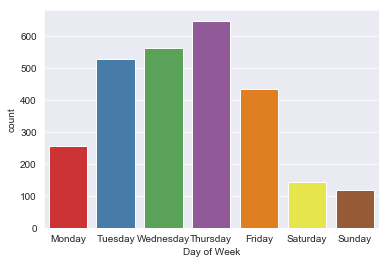

In [1479]:
# Create countplot showing frequency of rental posting by day of the week

sns.countplot(x = 'day_of_week', data = apts_toronto, palette = 'Set1', 
              order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
             )
plt.xlabel('Day of Week')

# It shows that posting rises dramatically from Monday, peaks on Thursday, and tapers off with few listing on the weekends

Text(0.5,0,'Hour of Day')

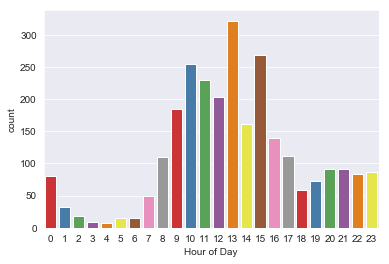

In [1480]:
# Create countplot showing frequency of rental posting by hour of the day

sns.countplot(x = 'hour_of_day', data = apts_toronto, palette = 'Set1', 
              order = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'] 
             )
plt.xlabel('Hour of Day')

# Looks like posting frequency increases shortly after 9am, then drops slightly during lunch hours, 
# then peaks at 1pm, and 2nd peak at 3pm with not much activities after work hours and during early morning

Text(0,0.5,'Price (in CA$)')

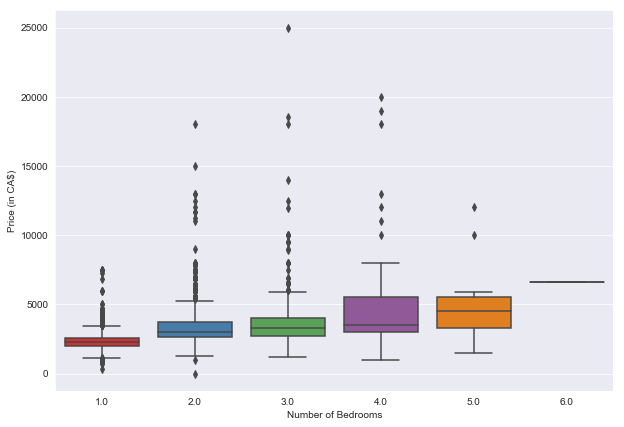

In [1481]:
# Create boxplot showing number of bedrooms vs. price 

plt.figure(figsize = (10,7))
sns.boxplot(x='num_bedrooms', y = 'price', data = apts_toronto, palette = "Set1")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price (in CA$)")

# Looks like the general trend is median rental price increases as number of bedrooms increases, which is hardly surprising
# And the interquantile range is quite tight for apartments with 1, 2, or 3 bedrooms. 
# But there are quite a few outliers within each category, particularly in the higher end of the price range

In [1482]:
# Investigate properties with price over CA$10000

apts_toronto[apts_toronto['price'] >= 10000].sort_values(by = 'price', ascending = False)

,title,listing_url,price,time_posted,num_bedrooms,sqft,description,neighborhood_new,day_of_week,hour_of_day
218,2 bedrooms 2 wasrooms Best condo for your money,https://toronto.craigslist.org/tor/apa/d/north...,498000.0,2019-08-15 11:44,NaN,NaN,\n \nSpacious Corner 2 Bedroom Unit Fac...,"Downsview-Roding-CFB, Toronto",Thursday,11
2226,Glamorous 3 Bedroom Victorian Brownstone with ...,https://toronto.craigslist.org/tor/apa/d/toron...,24995.0,2019-08-14 15:24,3.0,2000.0,\n \nYorkville Furnished Victorian Brow...,"Annex, Toronto",Wednesday,15
2412,Exquisite 4 Bedroom and 3 Bathroom Home,https://toronto.craigslist.org/tor/apa/d/etobi...,19995.0,2019-08-15 12:17,4.0,6000.0,\n \nFURNISHED – 4 BED + DEN – 3 BATH –...,"Edenbridge-Humber Valley, Toronto",Thursday,12
2689,"4 Bedroom, 3 Bathroom - Penthouse at Pier 27",https://toronto.craigslist.org/tor/apa/d/toron...,19000.0,2019-08-16 16:51,4.0,NaN,\n \nAvailable August 31st \nUnfurnishe...,"Waterfront Communities-The Island, Toronto",Friday,16
1098,"3 Bedroom, 4 Bathroom - Domus Yorkville",https://toronto.craigslist.org/tor/apa/d/toron...,18500.0,2019-08-08 16:03,3.0,NaN,\n \nAvailable Immediately \nUnfurnishe...,"Annex, Toronto",Thursday,16
2200,"Spectacular 3 Bedroom, 4 Bath with Stunning Cr...",https://toronto.craigslist.org/tor/apa/d/toron...,18000.0,2019-08-14 15:04,3.0,3000.0,\n \nForest Hill Toronto Furnished Hous...,"Forest Hill South, Toronto",Wednesday,15
2332,"2+1 Bedroom, 3 Bathroom - Ritz Carlton Private...",https://toronto.craigslist.org/tor/apa/d/toron...,18000.0,2019-08-15 09:19,2.0,NaN,\n \nAvailability Flexible \nFurnished ...,"Bay Street Corridor, Toronto",Thursday,9
1093,"4 Bedroom, 4 Bathroom - Milan Towers",https://toronto.craigslist.org/tor/apa/d/toron...,17999.0,2019-08-08 16:03,4.0,NaN,\n \nAvailable Immediately \nUnfurnishe...,"Rosedale-Moore Park, Toronto",Thursday,16
642,Amazing 2BR 2.5BA Immaculate Condo W/ Private ...,https://toronto.craigslist.org/tor/apa/d/toron...,15000.0,2019-08-13 13:46,2.0,2542.0,\n \nSpectacular South Facing Over The ...,"Annex, Toronto",Tuesday,13
94,"Spectacular 3 Bedroom, 1.5 Baths with Marble A...",https://toronto.craigslist.org/tor/apa/d/toron...,13995.0,2019-08-15 22:27,3.0,2000.0,\n \nCabbagetown Toronto Furnished Hous...,"Moss Park, Toronto",Thursday,22


In [1483]:
# Remove listing with price = CA$498000 since it's a home purchase ad

apts_toronto.drop(index = 218, axis = 0, inplace = True)

Text(0.5,50,'Square ft')

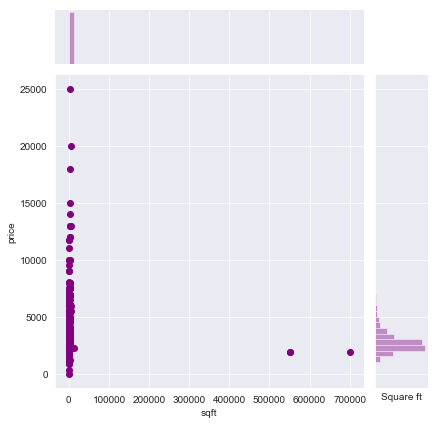

In [1484]:
# Create jointplot showing square feet vs. price

sns.jointplot(x = 'sqft', y = 'price', data = apts_toronto, color = 'purple')
plt.xlabel("Square ft")

In [1485]:
# Investigate properties with over 500,000 square feet

apts_toronto[apts_toronto['sqft'] > 500000]

,title,listing_url,price,time_posted,num_bedrooms,sqft,description,neighborhood_new,day_of_week,hour_of_day
127,Apartment for Rent Toronto,https://toronto.craigslist.org/tor/apa/d/scarb...,1900.0,2019-08-15 19:02,1.0,700550.0,\n \nAvailable right now:\nprice 1900.$...,"Clairlea-Birchmount, Toronto",Thursday,19
543,Apartment for Rent,https://toronto.craigslist.org/tor/apa/d/scarb...,1900.0,2019-08-13 19:09,1.0,550600.0,\n \nPrice 1900.$\nLocated at Warden/St...,"Clairlea-Birchmount, Toronto",Tuesday,19
2092,Apartment for rent,https://toronto.craigslist.org/tor/apa/d/scarb...,1900.0,2019-08-13 21:28,1.0,550750.0,\n \nRent 1900.$Per Month -\nLocated at...,"Clairlea-Birchmount, Toronto",Tuesday,21


In [1486]:
# Correct square ft value for these 3 listings above based on listing description
apts_toronto.loc[apts_toronto['sqft'].isin([700550.0, 550600.0,550750.0]), 'sqft'] = 550.0


Text(0.5,50,'Square ft')

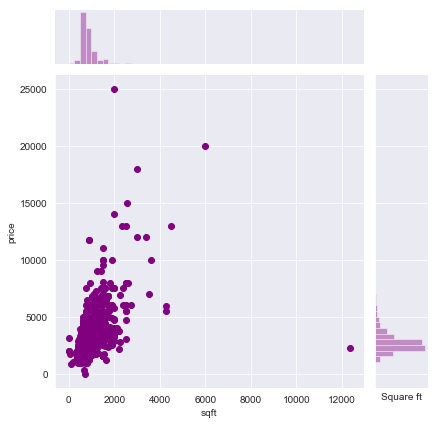

In [1487]:
# Plot jointplot showing square feet vs. price again

sns.jointplot(x = 'sqft', y = 'price', data = apts_toronto, color = 'purple')
plt.xlabel("Square ft")

In [1488]:
# Investigate the property with square ft above 12,000
apts_toronto[apts_toronto['sqft'] > 12000]

# Remove it since square ft info is incorrect
apts_toronto.drop(index = 2428, axis = 0, inplace = True)

In [1489]:
# Investigate properties with square ft < 300 
apts_toronto[apts_toronto['sqft'] < 300]

,title,listing_url,price,time_posted,num_bedrooms,sqft,description,neighborhood_new,day_of_week,hour_of_day
39,Luxury Executive Suite Offers 2 Beds / 2 Baths...,https://toronto.craigslist.org/tor/apa/d/toron...,3100.0,2019-08-16 11:51,2.0,1.0,\n \nWelcome Home! Renovated To The Nin...,"Waterfront Communities-The Island, Toronto",Friday,11
1072,One bedroom very nice - UT and YorkU - 5 min w...,https://toronto.craigslist.org/tor/apa/d/toron...,1690.0,2019-08-09 04:47,1.0,50.0,\n \n- Well lit 1 bedroom basement apar...,"Forest Hill North, Toronto",Friday,4
1279,Bachelor basement Apartment,https://toronto.craigslist.org/tor/apa/d/toron...,1000.0,2019-08-06 13:32,NaN,200.0,\n \nBachelor Apartment for Rent in the...,"Junction Area, Toronto",Tuesday,13
1594,Beautiful Bachelorette available Sept 1st @ Du...,https://toronto.craigslist.org/tor/apa/d/toron...,1999.0,2019-08-08 19:25,NaN,1.0,\n \nBeautiful bachelorette available a...,"Little Portugal, Toronto",Thursday,19
1762,Room for rent 3 bdrm 1100sqft Junction,https://toronto.craigslist.org/tor/apa/d/toron...,875.0,2019-08-11 09:22,1.0,110.0,"\n \nRoom to rent to share 3 Bedroom, 2...","Junction Area, Toronto",Sunday,9
1957,Bachelor avail. Sept 1st Major Intersection Du...,https://toronto.craigslist.org/tor/apa/d/toron...,1999.0,2019-08-13 09:22,NaN,1.0,\n \nBeautiful bachelor apartment avail...,"Little Portugal, Toronto",Tuesday,9


In [1490]:
# Set these properties with square ft = 1.0 to NaN
apts_toronto.loc[(apts_toronto['sqft'] == 1.0) & (apts_toronto['price'] == 3100.0), 'sqft'] = np.nan
apts_toronto.loc[(apts_toronto['sqft'] == 1.0) & (apts_toronto['price'] == 1999.0), 'sqft'] = np.nan


Text(0.5,50,'Area (sqft)')

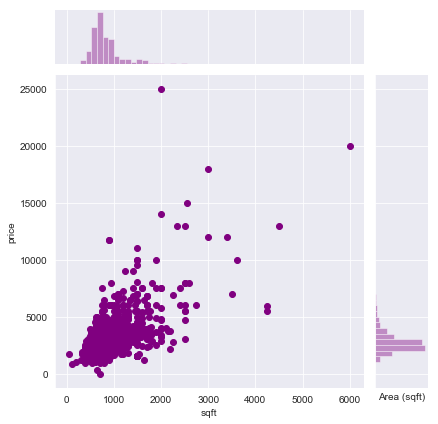

In [1491]:
# Plot jointplot showing square feet vs. price again

sns.jointplot(x = 'sqft', y = 'price', data = apts_toronto, color = 'purple')
plt.xlabel("Area (sqft)")

# Looks like price and square feet are positively correlated 
# And both price and square feet exhibit right-tail distribution:  
# The vast majority of properties come with room size under 1,000 square feet, and price less than CA$ 5,000/month

In [1512]:
# Convert 'num_bedroom' feature to categorical
apts_toronto_copy = apts_toronto.copy()
apts_toronto_copy['num_bedrooms'] = apts_toronto_copy['num_bedrooms'].astype(str)


Text(0.5,1,'Price vs. Square Footage Colored by Number of Bedrooms')

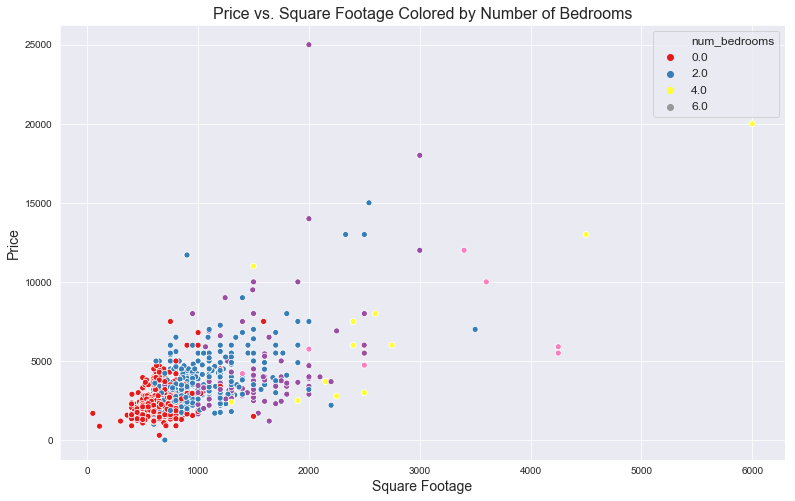

In [1516]:
plt.figure(figsize = (13,8))
sns.scatterplot(x = 'sqft', y = 'price', hue = 'num_bedrooms', data = apts_toronto, palette = 'Set1', 
               x_jitter=True, y_jitter=True, hue_order = apts_toronto['num_bedrooms'].value_counts().index)
plt.legend(fontsize=12)
plt.xlabel('Square Footage', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.title("Price vs. Square Footage Colored by Number of Bedrooms", fontsize=16)

# Color Scheme here is as follows: 
# 1.0: Red
# 2.0: Blue
# 3.0: Purple
# 4.0: Yellow
# 5.0: Pink
# 6.0: Grey

In [1498]:
apts_toronto['num_bedrooms'].value_counts()

1.0    1286
2.0     847
3.0     279
4.0      49
5.0      17
6.0       1
Name: num_bedrooms, dtype: int64

Text(-6.95,0.5,'Price')

<Figure size 936x576 with 0 Axes>

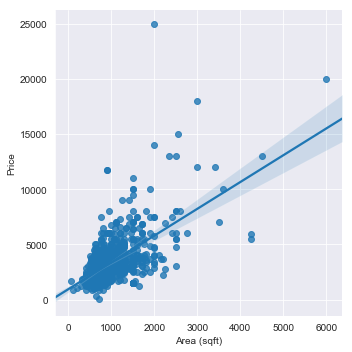

In [1517]:
# Create a linear model plot of Price vs. Square ft

sns.lmplot(x = 'sqft', y = 'price', data = apts_toronto, palette = "Set1")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")

Text(0.5,0,'Neighborhood')

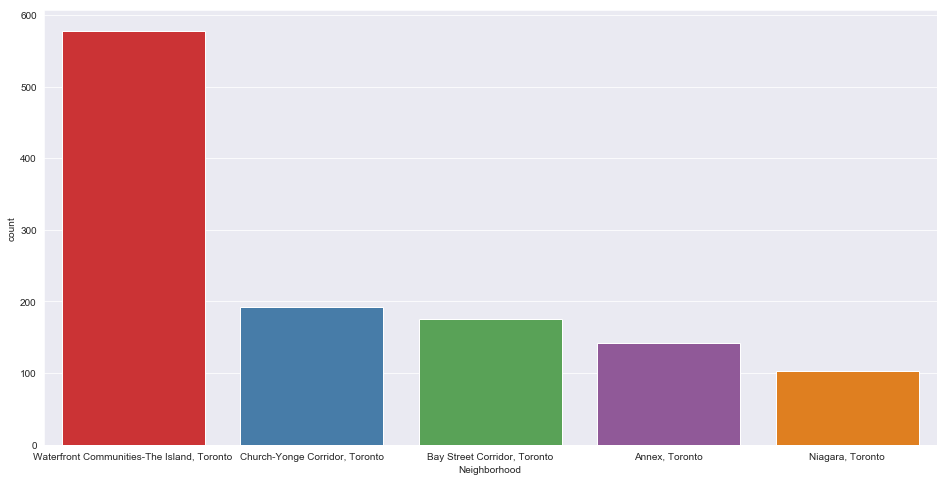

In [1397]:
# Create countplot showing top 5 neighborhood by counts

plt.figure(figsize = (16,8))
sns.countplot('neighborhood_new', data = apts_toronto, palette = 'Set1',
              order = apts_toronto['neighborhood_new'].value_counts().index[:5])
plt.xlabel("Neighborhood")

# All top 5 neighborhoods by count of apartment listings are located near or in Downtown Toronto
# which makes sense because that's where most of the job opportunities are and working professionals 
# need places to live closeby. 

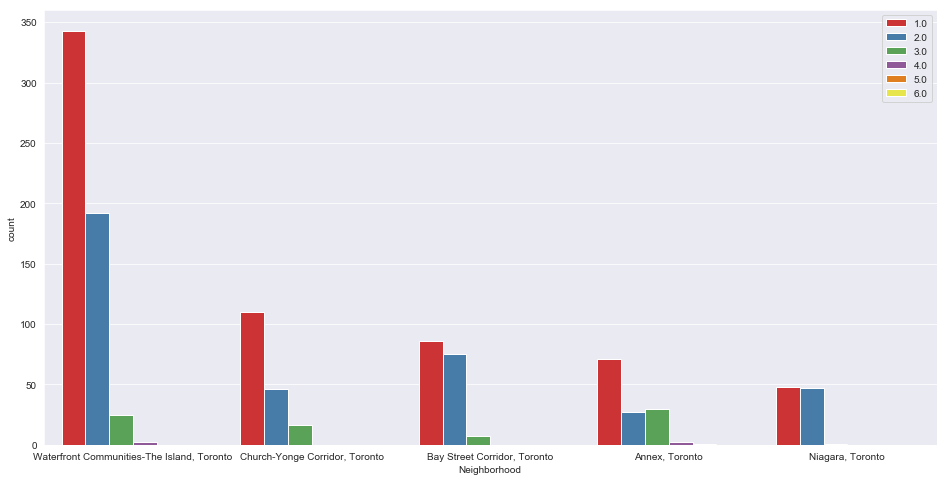

In [1398]:
# Create a countplot showing the counts of listings by neighborhood, with the color hue defined by number of bedrooms

plt.figure(figsize = (16,8))
sns.countplot('neighborhood_new', data = apts_toronto, palette = 'Set1',
              order = apts_toronto['neighborhood_new'].value_counts().index[:5], 
              hue = 'num_bedrooms')
plt.xlabel("Neighborhood")
plt.legend(loc = "upper right")

# Across all top 5 neighborhoods by count of listings, the majority of listings are offered in 1 or 2 bedroom apartments
# with 1-bedroom in significantly more supply than 2-bedroom, except for Bay Street Corridor and Niagara neighborhoods

Text(0,0.5,'Area (sqft)')

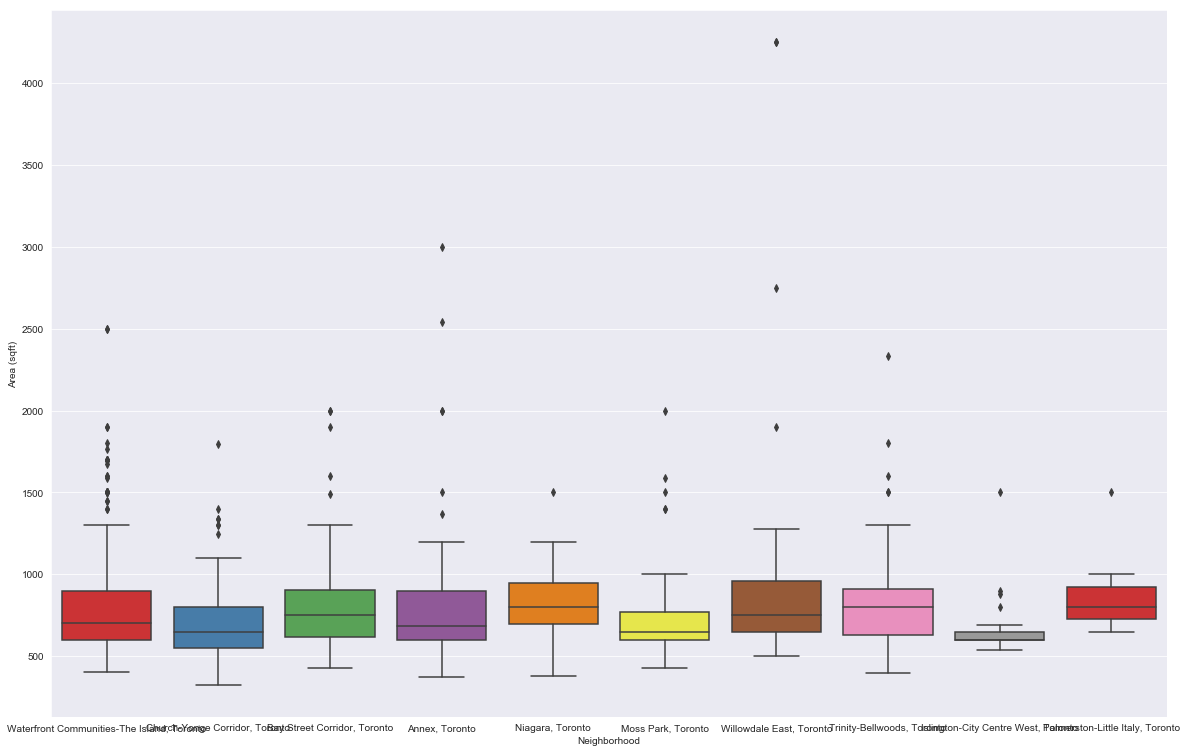

In [1399]:
# Create boxplot of square foot by top 10 neighborhoods by counts of listing

plt.figure(figsize = (20,13))
sns.boxplot(x='neighborhood_new', y = 'sqft', data = apts_toronto, palette = "Set1", 
           order = apts_toronto['neighborhood_new'].value_counts().index[:10])
plt.xlabel('Neighborhood')
plt.ylabel('Area (sqft)')

In [1400]:
apts_toronto.isnull().sum()

title                 0
listing_url           0
price                 0
time_posted           0
num_bedrooms        215
sqft                992
description           0
neighborhood_new      0
day_of_week           0
hour_of_day           0
dtype: int64

In [1401]:
# 1054 listings with NaN values in either 'num_bedrooms' and/or 'sqft' column, counting for 40% of total listings
# Removing those listings would produce biased estimates
a = apts_toronto.dropna(axis = 0)
a.shape

(1640, 10)

In [1319]:
apts_toronto.shape

(2694, 10)

In [1402]:
# Convert 'title' column to lower case

apts_toronto['title'] = apts_toronto['title'].str.lower()

apts_toronto['description'] = apts_toronto['description'].str.lower()


In [1403]:
# Category 1: missing num_bedrooms only
apts_toronto[apts_toronto['num_bedrooms'].isnull() & (~apts_toronto['sqft'].isnull())].shape

(62, 10)

In [1404]:
# Deal with missing values in Category 1
apts_toronto.loc[(apts_toronto['title'].str.contains('studio') | apts_toronto['title'].str.contains('bachelor')) 
             & (apts_toronto['num_bedrooms'].isnull()) 
             & (~apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 1.0

apts_toronto.loc[( apts_toronto['description'].str.contains('bachelor') 
             | apts_toronto['description'].str.contains('studio apartment')
             | apts_toronto['description'].str.contains('studio loft')
             | apts_toronto['description'].str.contains('modern studio')) 
             & (apts_toronto['num_bedrooms'].isnull()) 
             & (~apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['title'].str.contains('1 bedroom') | apts_toronto['title'].str.contains('1br') 
             | apts_toronto['title'].str.contains('1 bed') | apts_toronto['title'].str.contains('1 bdrm')) 
             & (apts_toronto['num_bedrooms'].isnull()) 
             & (~apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['title'].str.contains('2 bedroom') | apts_toronto['title'].str.contains('2bdrm')) 
             & (apts_toronto['num_bedrooms'].isnull()) 
             & (~apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 2.0

apts_toronto.loc[(apts_toronto['description'].str.contains('2 bed')) 
             & (apts_toronto['num_bedrooms'].isnull()) 
             & (~apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 2.0

apts_toronto.loc[(apts_toronto['title'].str.contains('3 bedroom')) 
             & (apts_toronto['num_bedrooms'].isnull()) 
             & (~apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 3.0

apts_toronto.loc[(apts_toronto['description'].str.contains('3 large rooms')) 
             & (apts_toronto['num_bedrooms'].isnull()) 
             & (~apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 3.0

apts_toronto.loc[(apts_toronto['title'].str.contains('charming condo in prime location of'))
            & (apts_toronto['price'] == 2000.0)
            & (apts_toronto['sqft'] == 499.0)
            & (apts_toronto['time_posted'] == '2019-08-10 12:23'), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['title'].str.contains('elegant & bright multi condo in the heart'))
            & (apts_toronto['price'] == 2100.0)
            & (apts_toronto['sqft'] == 499.0)
            & (apts_toronto['time_posted'] == '2019-08-07 11:33'), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['title'].str.contains('elegant condo in the heart of downtown'))
            & (apts_toronto['price'] == 2000.0)
            & (apts_toronto['sqft'] == 499.0)
            & (apts_toronto['time_posted'] == '2019-08-10 12:30'), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['title'].str.contains('commercial or residential townhouse loft'))
            & (apts_toronto['price'] == 2650.0)
            & (apts_toronto['sqft'] == 650.0)
            & (apts_toronto['time_posted'] == '2019-08-06 22:25'), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['title'].str.contains('king west village bright and spacious great'))
            & (apts_toronto['price'] == 1950.0)
            & (apts_toronto['sqft'] == 382.0)
            & (apts_toronto['time_posted'] == '2019-08-09 00:18'), 'num_bedrooms'] = 1.0


In [1405]:
apts_toronto[apts_toronto['num_bedrooms'].isnull() & (~apts_toronto['sqft'].isnull())].shape

(0, 10)

In [1406]:
# Category 2: missing sqft only
apts_toronto[(~apts_toronto['num_bedrooms'].isnull()) & (apts_toronto['sqft'].isnull())].shape

(839, 10)

In [1018]:
# sqft_missing = apts_toronto[(~apts_toronto['num_bedrooms'].isnull()) & (apts_toronto['sqft'].isnull())]
# sqft_missing.to_excel('sqft_missing_only_839_listings.xlsx')

In [1407]:
# Fix 'num_bedrooms' column for certain rows in Category 2
apts_toronto.loc[(apts_toronto['title'].str.contains('2 bedroom')) 
                 & (~apts_toronto['num_bedrooms'].isnull()) 
                 & (apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 2.0

apts_toronto.loc[(apts_toronto['title'].str.contains('3 bdrm loft')) 
                 & (~apts_toronto['num_bedrooms'].isnull()) 
                 & (apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 3.0


In [1408]:
apts_toronto_copy = apts_toronto.copy()
apts_toronto_copy[(~apts_toronto_copy['num_bedrooms'].isnull()) & (apts_toronto_copy['sqft'].isnull())].shape

(839, 10)

In [1409]:
# Fill in 'sqft' column in Category 2 based on listing description using regular expression
def fill_in_sqft_category_2(x): 
    import re
    import math
    if (~pd.isnull(x['num_bedrooms'])) & (pd.isnull(x['sqft'])): 
        
        pattern_1 = re.compile('(\d{3,})\ssquare\sfeet')
        result_1 = pattern_1.findall(x['description'])
        sqft_1 = float(result_1[0]) if result_1 else np.nan
             
        pattern_2 = re.compile('(\d{3,})\ssf')
        result_2 = pattern_2.findall(x['description'])
        sqft_2 = float(result_2[0]) if result_2 else np.nan
        
        if (~math.isnan(sqft_1)) & (~math.isnan(sqft_2)): 
            return min(sqft_1, sqft_2)
        elif (~math.isnan(sqft_1)) & (math.isnan(sqft_2)): 
            return sqft_1
        elif (math.isnan(sqft_1)) & (~math.isnan(sqft_2)): 
            return sqft_2
        else: 
            return np.nan
    
    else: 
        return x['sqft']
        
apts_toronto['sqft'] = apts_toronto.apply(fill_in_sqft_category_2, axis = 1)

In [1410]:
apts_toronto[(~apts_toronto['num_bedrooms'].isnull()) & (apts_toronto['sqft'].isnull())].shape

(756, 10)

In [1411]:
# For the remaining listings in Category 2 with missing value in 'sqft' column, 
# take the group of listings sharing the same neighborhood and number of bedrooms, 
# and calculate the mean of sqft as value to be imputed
def impute_sqft_category_2(x): 
    if (~pd.isnull(x['num_bedrooms'])) & (pd.isnull(x['sqft'])): 
        neighborhood = x['neighborhood_new']
        bedroom = x['num_bedrooms']
        return apts_toronto[(apts_toronto['neighborhood_new'] == neighborhood) & (apts_toronto['num_bedrooms'] == bedroom)]['sqft'].mean(skipna = True)
    
    else: 
        return x['sqft']

apts_toronto['sqft'] = apts_toronto.apply(impute_sqft_category_2, axis = 1)


In [1412]:
apts_toronto[(~apts_toronto['num_bedrooms'].isnull()) & (apts_toronto['sqft'].isnull())].shape

(119, 10)

In [1216]:
# sqft_missing_remaining_119_listings = apts_toronto[(~apts_toronto['num_bedrooms'].isnull()) & (apts_toronto['sqft'].isnull())]
# sqft_missing_remaining_119_listings.to_excel('sqft_missing_remaining_119_listings.xlsx')


In [1413]:
# After imputation, there remains 119 listings of which each is the only unique occurrence within that group of 
# neighborhood and number of bedrooms, therefore their sqft value cannot be imputed using mean calculation
# Check if their title contains square feet info:

apts_toronto.loc[(apts_toronto['title'].str.contains('stunning home 2 parking spots over 1600sqft!'))
               & (apts_toronto['neighborhood_new'] == 'High Park-Swansea, Toronto')
               & (apts_toronto['time_posted'] == '2019-08-08 11:39'), 'sqft'] = 1600.0

apts_toronto.loc[(apts_toronto['title'].str.contains('gorgeous home mins to yorkville parking included over 1500sqft!'))
               & (apts_toronto['neighborhood_new'] == 'North Saint James Town, Toronto')
               & (apts_toronto['time_posted'] == '2019-08-08 11:33'), 'sqft'] = 1500.0


In [1414]:
apts_toronto[(~apts_toronto['num_bedrooms'].isnull()) & (apts_toronto['sqft'].isnull())].shape

(117, 10)

In [1333]:
apts_toronto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2694 entries, 0 to 2695
Data columns (total 10 columns):
title               2694 non-null object
listing_url         2694 non-null object
price               2694 non-null float64
time_posted         2694 non-null object
num_bedrooms        2541 non-null float64
sqft                2424 non-null float64
description         2694 non-null object
neighborhood_new    2694 non-null object
day_of_week         2694 non-null object
hour_of_day         2694 non-null object
dtypes: float64(3), object(7)
memory usage: 311.5+ KB


In [1415]:
# Category 3: missing both
apts_toronto[apts_toronto['num_bedrooms'].isnull() & apts_toronto['sqft'].isnull()].shape

(153, 10)

In [1223]:
# missing_both = apts_toronto[apts_toronto['num_bedrooms'].isnull() & apts_toronto['sqft'].isnull()]
# missing_both.to_excel('missing_both_153_listings.xlsx')

In [1416]:
# Deal with missing values in 'num_bedrooms' column for Category 3

apts_toronto.loc[(apts_toronto['title'].str.contains('studio') 
               |  apts_toronto['title'].str.contains('bachelor')) 
               & (apts_toronto['num_bedrooms'].isnull()) 
               & (apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['description'].str.contains('bachelor') 
               |  apts_toronto['description'].str.contains('studio apartment')
               |  apts_toronto['description'].str.contains('studio loft')
               |  apts_toronto['description'].str.contains('open-concept studio') 
               |  apts_toronto['description'].str.contains('modern studio')) 
               & (apts_toronto['num_bedrooms'].isnull()) 
               & (apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['title'].str.contains('1 bedroom') 
                | apts_toronto['title'].str.contains('one bedroom') 
                | apts_toronto['title'].str.contains('1br') 
                | apts_toronto['title'].str.contains('1 bed + 1 bath') 
                | apts_toronto['title'].str.contains('1 bdrm')
                | apts_toronto['description'].str.contains('1 bed')
                | apts_toronto['description'].str.contains('one bedroom')) 
                & (apts_toronto['num_bedrooms'].isnull()) 
                & (apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['title'].str.contains('2 bedrooms') 
                | apts_toronto['title'].str.contains('2bdrm')
                | apts_toronto['title'].str.contains('2br')) 
                & (apts_toronto['num_bedrooms'].isnull()) 
                & (apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 2.0

apts_toronto.loc[(apts_toronto['description'].str.contains('2 bed')
               |  apts_toronto['description'].str.contains('two bedrooms')) 
               & (apts_toronto['num_bedrooms'].isnull()) 
               & (apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 2.0

apts_toronto.loc[(apts_toronto['title'].str.contains('3br')) 
             & (apts_toronto['num_bedrooms'].isnull()) 
             & (apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 3.0

apts_toronto.loc[(apts_toronto['description'].str.contains('3 large rooms') 
               |  apts_toronto['description'].str.contains('3+2br')
               |  apts_toronto['description'].str.contains('3br'))
               & (apts_toronto['num_bedrooms'].isnull()) 
               & (apts_toronto['sqft'].isnull()), 'num_bedrooms'] = 3.0

apts_toronto.loc[(apts_toronto['title'].str.contains('mins to church/wellesley floor to ceiling'))
             & (apts_toronto['neighborhood_new'] == 'Church-Yonge Corridor, Toronto') 
             & (apts_toronto['price'] == 2000.0), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['time_posted'] == '2019-08-08 06:05')
             & (apts_toronto['neighborhood_new'] == 'Waterfront Communities-The Island, Toronto') 
             & (apts_toronto['price'] == 2200.0), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['title'].str.contains('room for rent'))
             & (apts_toronto['neighborhood_new'] == 'Black Creek, Toronto') 
             & (apts_toronto['price'] == 680.0), 'num_bedrooms'] = 1.0

apts_toronto.loc[(apts_toronto['title'].str.contains('apartment for rent'))
             & (apts_toronto['neighborhood_new'] == 'Caledonia-Fairbank, Toronto') 
             & (apts_toronto['price'] == 1700.0), 'num_bedrooms'] = 1.0

apts_toronto[apts_toronto['num_bedrooms'].isnull() & apts_toronto['sqft'].isnull()].shape



(16, 10)

In [1417]:
# The remaining listings with both column values missing (to be removed since most of them are ads, not actual listings)
apts_toronto[apts_toronto['num_bedrooms'].isnull() & apts_toronto['sqft'].isnull()]

,title,listing_url,price,time_posted,num_bedrooms,sqft,description,neighborhood_new,day_of_week,hour_of_day
237,25-35-45 trudelle street (1-2-3 bedroom),https://toronto.craigslist.org/tor/apa/d/scarb...,1500.0,2019-08-15 10:21,NaN,NaN,\n \n25-35-45 trudelle street (1-2-3 be...,"Eglinton East, Toronto",Thursday,10
878,downtown rentals,https://toronto.craigslist.org/tor/apa/d/west-...,2000.0,2019-08-11 10:42,NaN,NaN,\n \nwould you like a free professional...,"Trinity-Bellwoods, Toronto",Sunday,10
1056,yorkville fully furnished + den cute and spaci...,https://toronto.craigslist.org/tor/apa/d/toron...,2000.0,2019-08-09 00:41,NaN,NaN,"\n \nfurnished unit, walk to uoft and 2...","Church-Yonge Corridor, Toronto",Friday,0
1107,"the rental market is a gong show, use a realto...",https://toronto.craigslist.org/tor/apa/d/toron...,1900.0,2019-08-08 12:04,NaN,NaN,\n \nif you're a tenant you'll likely e...,"Corso Italia-Davenport, Toronto",Thursday,12
1535,25-35-45 trudelle street (1-2-3 bedroom),https://toronto.craigslist.org/tor/apa/d/scarb...,1500.0,2019-08-08 09:05,NaN,NaN,\n \n25-35-45 trudelle street (1-2-3 be...,"Eglinton East, Toronto",Thursday,9
1541,25-35-45 trudelle street (1-2-3 bedroom),https://toronto.craigslist.org/tor/apa/d/scarb...,1500.0,2019-08-08 09:30,NaN,NaN,\n \n25-35-45 trudelle street (1-2-3 be...,"Eglinton East, Toronto",Thursday,9
1850,25-35-45 trudelle street (1-2-3 bedroom),https://toronto.craigslist.org/tor/apa/d/scarb...,1500.0,2019-08-12 10:09,NaN,NaN,\n \n25-35-45 trudelle street (1-2-3 be...,"Eglinton East, Toronto",Monday,10
2348,25-35-45 trudelle street (1-2-3 bedroom),https://toronto.craigslist.org/tor/apa/d/scarb...,1500.0,2019-08-15 10:13,NaN,NaN,\n \n25-35-45 trudelle street (1-2-3 be...,"Eglinton East, Toronto",Thursday,10
2356,25-35-45 trudelle street (1-2-3 bedroom),https://toronto.craigslist.org/tor/apa/d/scarb...,1500.0,2019-08-15 10:14,NaN,NaN,\n \n25-35-45 trudelle street (1-2-3 be...,"Eglinton East, Toronto",Thursday,10
2357,25-35-45 trudelle street (1-2-3 bedroom),https://toronto.craigslist.org/tor/apa/d/scarb...,1500.0,2019-08-15 10:14,NaN,NaN,\n \n25-35-45 trudelle street (1-2-3 be...,"Eglinton East, Toronto",Thursday,10


In [1418]:
# Deal with missing values in 'sqft' column for Category 3

apts_toronto.loc[(apts_toronto['title'].str.contains('2 bedroom apartment for lease immediately'))
               & (apts_toronto['neighborhood_new'] == 'Bedford Park-Nortown, Toronto') 
               & (apts_toronto['time_posted'] == '2019-08-15 14:12'), 'sqft'] = 1000.0

apts_toronto.loc[(apts_toronto['title'].str.contains('furnished studio at bisha - entertainment district downtown!'))
               & (apts_toronto['neighborhood_new'] == 'Waterfront Communities-The Island, Toronto') 
               & (apts_toronto['time_posted'] == '2019-08-07 10:44'), 'sqft'] = 412.0

In [1419]:
apts_toronto[(~apts_toronto['num_bedrooms'].isnull()) & (apts_toronto['sqft'].isnull())].shape

(252, 10)

In [1420]:
# Imputation for missing values in Category 3
# Since I have filled in most of values in 'num_bedrooms' column in Category 3, essentially Category 3 problem 
# becomes Category 2 problem, which is only sqft missing
# Therefore use impute_sqft_category_2 function to impute sqft column
# For each listing in Category 3 with missing values in 'sqft' column, take the group of listings sharing the same 
# neighborhood and number of bedrooms, and calculate the mean of sqft as value to be imputed

def impute_sqft_category_2(x): 
    if (~pd.isnull(x['num_bedrooms'])) & (pd.isnull(x['sqft'])): 
        neighborhood = x['neighborhood_new']
        bedroom = x['num_bedrooms']
        return apts_toronto[(apts_toronto['neighborhood_new'] == neighborhood) & (apts_toronto['num_bedrooms'] == bedroom)]['sqft'].mean(skipna = True)
    
    else: 
        return x['sqft']

apts_toronto['sqft'] = apts_toronto.apply(impute_sqft_category_2, axis = 1)


In [1421]:
apts_toronto[(~apts_toronto['num_bedrooms'].isnull()) & (apts_toronto['sqft'].isnull())].sort_values(by = 'neighborhood_new')

,title,listing_url,price,time_posted,num_bedrooms,sqft,description,neighborhood_new,day_of_week,hour_of_day
1642,34 robindale ave,https://toronto.craigslist.org/tor/apa/d/etobi...,2650.0,2019-08-09 12:42,3.0,NaN,\n \nbeautiful newly renovated 3 bedroo...,"Alderwood, Toronto",Friday,12
908,excellent fully furnished 1 bedroom unit,https://toronto.craigslist.org/mss/apa/d/etobi...,1000.0,2019-08-11 04:32,1.0,NaN,\n \nexcellent fully furnished 1 bedroo...,"Alderwood, Toronto",Sunday,4
1645,34 robindale ave,https://toronto.craigslist.org/tor/apa/d/etobi...,2650.0,2019-08-09 12:42,1.0,NaN,\n \nbeautiful newly renovated 3 bedroo...,"Alderwood, Toronto",Friday,12
761,master bedroom in beautiful and fully furnishe...,https://toronto.craigslist.org/tor/apa/d/toron...,1500.0,2019-08-12 22:06,5.0,NaN,\n \navailable september 1st\n\ndelight...,"Annex, Toronto",Monday,22
1216,amazing whole house at leslie & lawrence!,https://toronto.craigslist.org/tor/apa/d/north...,3000.0,2019-08-07 10:58,3.0,NaN,\n \namazing private sun filled 2+1 bed...,"Banbury-Don Mills, Toronto",Wednesday,10
208,toronto by sandbar willow way and leslie stree...,https://toronto.craigslist.org/tor/apa/d/north...,2650.0,2019-08-15 11:02,3.0,NaN,\n \non sandbar willow way near leslie ...,"Bayview Village, Toronto",Thursday,11
2263,sunfilled one bedroom + den + parking – 17 rud...,https://toronto.craigslist.org/tor/apa/d/north...,2200.0,2019-08-14 16:19,1.0,NaN,\n \nsunfilled one bedroom + den + park...,"Bayview Woods-Steeles, Toronto",Wednesday,16
1265,full house modern look fin basement detached g...,https://toronto.craigslist.org/tor/apa/d/toron...,3950.0,2019-08-07 11:59,3.0,NaN,\n \nbeautifully renovated 3+1 bdrm fam...,"Bedford Park-Nortown, Toronto",Wednesday,11
777,beautifully renovated 3+1 bdrm family home at ...,https://toronto.craigslist.org/tor/apa/d/toron...,3950.0,2019-08-12 11:09,3.0,NaN,\n \nbeautifully renovated 3+1 bdrm fam...,"Bedford Park-Nortown, Toronto",Monday,11
2088,spacious & clean 4 bedroom + 3 bath!!,https://toronto.craigslist.org/tor/apa/d/york-...,3450.0,2019-08-13 21:01,4.0,NaN,"\n \nclean, family home on a court, wit...","Beechborough-Greenbrook, Toronto",Tuesday,21


In [1422]:
apts_toronto.isnull().sum()

title                 0
listing_url           0
price                 0
time_posted           0
num_bedrooms         16
sqft                173
description           0
neighborhood_new      0
day_of_week           0
hour_of_day           0
dtype: int64

In [1423]:
# Remove any rows with NaN values
apts_toronto.dropna(axis = 0, how = 'any', inplace = True)

In [1424]:
# Re-index dataframe
apts_toronto.reset_index(drop = True, inplace = True)

In [1425]:
apts_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 10 columns):
title               2521 non-null object
listing_url         2521 non-null object
price               2521 non-null float64
time_posted         2521 non-null object
num_bedrooms        2521 non-null float64
sqft                2521 non-null float64
description         2521 non-null object
neighborhood_new    2521 non-null object
day_of_week         2521 non-null object
hour_of_day         2521 non-null object
dtypes: float64(3), object(7)
memory usage: 197.0+ KB


In [ ]:
## Determine if the outlier here is influential 

Text(0.5,50,'Area (sqft)')

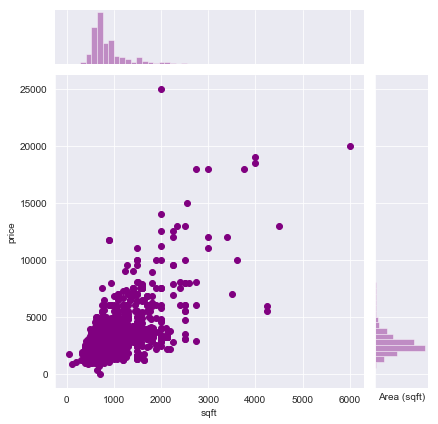

In [1426]:
# Plot jointplot showing square feet vs. price again

sns.jointplot(x = 'sqft', y = 'price', data = apts_toronto, color = 'purple')
plt.xlabel("Area (sqft)")

In [1427]:
apts_toronto[apts_toronto['price'] > 22000]
# Looks like the listing is legit

,title,listing_url,price,time_posted,num_bedrooms,sqft,description,neighborhood_new,day_of_week,hour_of_day
2102,glamorous 3 bedroom victorian brownstone with ...,https://toronto.craigslist.org/tor/apa/d/toron...,24995.0,2019-08-14 15:24,3.0,2000.0,\n \nyorkville furnished victorian brow...,"Annex, Toronto",Wednesday,15


In [1428]:
apts_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 10 columns):
title               2521 non-null object
listing_url         2521 non-null object
price               2521 non-null float64
time_posted         2521 non-null object
num_bedrooms        2521 non-null float64
sqft                2521 non-null float64
description         2521 non-null object
neighborhood_new    2521 non-null object
day_of_week         2521 non-null object
hour_of_day         2521 non-null object
dtypes: float64(3), object(7)
memory usage: 197.0+ KB


In [1429]:
# Convert 'neighborhood_new' column to Categorical Features

apts_toronto = pd.get_dummies(data = apts_toronto, columns = ['neighborhood_new'], drop_first = True)

In [1430]:
# Convert 'num_bedrooms' column to Categorical Features

apts_toronto = pd.get_dummies(data = apts_toronto, columns = ['num_bedrooms'], drop_first = True)

In [1431]:
apts_toronto.drop(['title', 'listing_url', 'time_posted', 'description', 'day_of_week', 'hour_of_day'], 
                  axis = 1, inplace = True)

In [1432]:
apts_toronto.columns

Index(['price', 'sqft', 'neighborhood_new_Alderwood, Toronto',
       'neighborhood_new_Annex, Toronto',
       'neighborhood_new_Banbury-Don Mills, Toronto',
       'neighborhood_new_Bathurst Manor, Toronto',
       'neighborhood_new_Bay Street Corridor, Toronto',
       'neighborhood_new_Bayview Village, Toronto',
       'neighborhood_new_Bedford Park-Nortown, Toronto',
       'neighborhood_new_Beechborough-Greenbrook, Toronto',
       ...
       'neighborhood_new_Woodbine-Lumsden, Toronto',
       'neighborhood_new_Wychwood, Toronto',
       'neighborhood_new_Yonge-Eglinton, Toronto',
       'neighborhood_new_Yonge-Saint Clair, Toronto',
       'neighborhood_new_York University Heights, Toronto',
       'neighborhood_new_Yorkdale-Glen Park, Toronto', 'num_bedrooms_2.0',
       'num_bedrooms_3.0', 'num_bedrooms_4.0', 'num_bedrooms_5.0'],
      dtype='object', length=121)

In [1433]:
# Dataframe that excludes and includes outlier
apts_toronto_exclude_outlier = apts_toronto.drop(index = 2102, axis = 0)

In [1435]:
# Train the model

X_include_outlier = apts_toronto.drop('price', axis = 1)
y_include_outlier = apts_toronto['price']

X_exclude_outlier = apts_toronto_exclude_outlier.drop('price', axis = 1)
y_exclude_outlier = apts_toronto_exclude_outlier['price']

from sklearn.linear_model import LinearRegression

lm_include_outlier = LinearRegression()
lm_include_outlier.fit(X_include_outlier,y_include_outlier)

lm_exclude_outlier = LinearRegression()
lm_exclude_outlier.fit(X_exclude_outlier,y_exclude_outlier)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1436]:
# Prediction from the model

predictions_include_outlier = lm_include_outlier.predict(X_include_outlier)

predictions_exclude_outlier = lm_exclude_outlier.predict(X_exclude_outlier)

In [1437]:
from sklearn.metrics import mean_squared_error, r2_score

# When including outlier:
# The mean squared error
print("Including outlier, Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_include_outlier, predictions_include_outlier)))
# Explained variance score: 1 is perfect prediction
print('Including outlier, R square score: %.2f' % r2_score(y_include_outlier, predictions_include_outlier))


# When excluding outlier:
# The mean squared error
print("Excluding outlier, Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_exclude_outlier, predictions_exclude_outlier)))
# Explained variance score: 1 is perfect prediction
print('Excluding outlier, R square score: %.2f' % r2_score(y_exclude_outlier, predictions_exclude_outlier))

Including outlier, Mean squared error: 1102.06
Including outlier, R square score: 0.57
Excluding outlier, Mean squared error: 1035.26
Excluding outlier, R square score: 0.59


In [1441]:
coeff_df = pd.DataFrame(lm_include_outlier.coef_,X_include_outlier.columns,columns=['Coefficient_include_outlier'])
coeff_df

,Coefficient_include_outlier
sqft,2.830937
"neighborhood_new_Alderwood, Toronto",-1112.514956
"neighborhood_new_Annex, Toronto",377.840592
"neighborhood_new_Banbury-Don Mills, Toronto",-385.539370
"neighborhood_new_Bathurst Manor, Toronto",-506.389480
"neighborhood_new_Bay Street Corridor, Toronto",576.073707
"neighborhood_new_Bayview Village, Toronto",-258.570975
"neighborhood_new_Bedford Park-Nortown, Toronto",-650.993680
"neighborhood_new_Beechborough-Greenbrook, Toronto",-1081.453749
"neighborhood_new_Bendale, Toronto",-776.753489


In [ ]:
# Use statsmodel instead since sklearn doesn't produce standard error or p-value result

import statsmodels.api as sm

In [1456]:
# Including outlier

X_include_outlier = sm.add_constant(X_include_outlier)
model_include_outlier = sm.OLS(y_include_outlier, X_include_outlier).fit()
predict_include_outlier = model_include_outlier.predict(X_include_outlier)

print_model_include_outlier = model_include_outlier.summary()
print(print_model_include_outlier)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     26.10
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:07:12   Log-Likelihood:                -21237.
No. Observations:                2521   AIC:                         4.272e+04
Df Residuals:                    2400   BIC:                         4.342e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [1457]:
# Excluding outlier

X_exclude_outlier = sm.add_constant(X_exclude_outlier)
X_exclude_outlier = sm.add_constant(X_exclude_outlier)
model_exclude_outlier = sm.OLS(y_exclude_outlier, X_exclude_outlier).fit()
predict_exclude_outlier = model_exclude_outlier.predict(X_exclude_outlier)

print_model_exclude_outlier = model_exclude_outlier.summary()
print(print_model_exclude_outlier)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     28.64
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:07:51   Log-Likelihood:                -21071.
No. Observations:                2520   AIC:                         4.238e+04
Df Residuals:                    2399   BIC:                         4.309e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [1453]:
# There are certainly minor side effects of including the outlier (2000 sqft, CA$24995.0), but none too serious: 

# 1) The Adjusted R^2 value has decreased slightly, from 0.568 to 0.544
# 2) The standard error of sqft, which is used to calculate the confidence interval for the corresponding coefficient,
#    is slightly larger when the outlier is included, (increases to 0.087 from 0.081) thereby increasing the width of our confidence interval. 
#    Since standard error depends on the mean squared error MSE, which quantifies the difference between the observed 
#    and predicted responses. It is because the outlier's y value is outside of the general trend of the rest of the data
#    not because the data point is influential in any way
# 3) In each case, the P-value for testing the null hypothesis that sqft feature has no effect is less than 0.001. 
#    in either case, we can conclude that there is sufficient evidence that at the 0.05 level, sqft is related to price

# In short, the predicted responses, estimated slope coefficient, and hypothesis test results are not affected by 
# the inclusion of the outlier. Therefore, the data point is not deemed influential. 


In [ ]:
## Determine if the leverage point here is influential 

Text(0.5,50,'Area (sqft)')

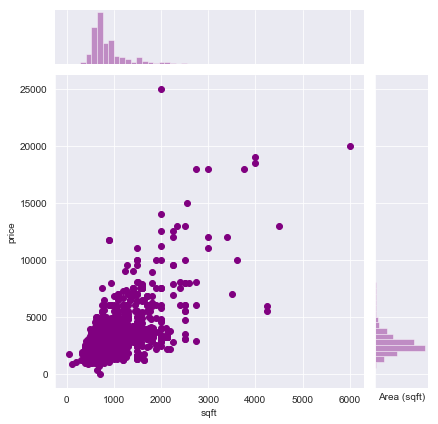

In [1459]:
# Plot jointplot showing square feet vs. price again

sns.jointplot(x = 'sqft', y = 'price', data = apts_toronto, color = 'purple')
plt.xlabel("Area (sqft)")

In [1458]:
apts_toronto[apts_toronto['sqft'] > 5500]
# Looks like the listing is legit

,price,sqft,"neighborhood_new_Alderwood, Toronto","neighborhood_new_Annex, Toronto","neighborhood_new_Banbury-Don Mills, Toronto","neighborhood_new_Bathurst Manor, Toronto","neighborhood_new_Bay Street Corridor, Toronto","neighborhood_new_Bayview Village, Toronto","neighborhood_new_Bedford Park-Nortown, Toronto","neighborhood_new_Beechborough-Greenbrook, Toronto",...,"neighborhood_new_Woodbine-Lumsden, Toronto","neighborhood_new_Wychwood, Toronto","neighborhood_new_Yonge-Eglinton, Toronto","neighborhood_new_Yonge-Saint Clair, Toronto","neighborhood_new_York University Heights, Toronto","neighborhood_new_Yorkdale-Glen Park, Toronto",num_bedrooms_2.0,num_bedrooms_3.0,num_bedrooms_4.0,num_bedrooms_5.0
2258,19995.0,6000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [1463]:
# Dataframe that excludes and includes leverage point
apts_toronto_exclude_leveragepoint = apts_toronto.drop(index = 2258, axis = 0)

In [1465]:
# Train the model 

X_include_leveragepoint = apts_toronto.drop('price', axis = 1)
y_include_leveragepoint = apts_toronto['price']

X_exclude_leveragepoint = apts_toronto_exclude_leveragepoint.drop('price', axis = 1)
y_exclude_leveragepoint = apts_toronto_exclude_leveragepoint['price']


In [1466]:
# Including leverage point

X_include_leveragepoint= sm.add_constant(X_include_leveragepoint)
model_include_leveragepoint = sm.OLS(y_include_leveragepoint, X_include_leveragepoint).fit()
predict_include_leveragepoint = model_include_leveragepoint.predict(X_include_leveragepoint)

print_model_include_leveragepoint = model_include_leveragepoint.summary()
print(print_model_include_leveragepoint)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     26.10
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:27:23   Log-Likelihood:                -21237.
No. Observations:                2521   AIC:                         4.272e+04
Df Residuals:                    2400   BIC:                         4.342e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [1467]:
# Excluding leverage point

X_exclude_leveragepoint= sm.add_constant(X_exclude_leveragepoint)
model_exclude_leveragepoint = sm.OLS(y_exclude_leveragepoint, X_exclude_leveragepoint).fit()
predict_exclude_leveragepoint = model_exclude_leveragepoint.predict(X_exclude_leveragepoint)

print_model_exclude_leveragepoint = model_exclude_leveragepoint.summary()
print(print_model_exclude_leveragepoint)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     24.32
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:28:16   Log-Likelihood:                -21225.
No. Observations:                2520   AIC:                         4.269e+04
Df Residuals:                    2399   BIC:                         4.340e+04
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [ ]:
# As shown above, similar to outlier rationale earlier, 
# the predicted responses, estimated slope coefficient, and hypothesis test results are not affected by 
# the inclusion of the leverage point. Therefore, the data point is not deemed influential.  

In [ ]:
## Modeling No.1
# treating 'num_bedrooms' as continuous variable and 'neighborhood_new' as categorical variable

In [1243]:
# Convert 'neighborhood_new' column to Categorical Features

apts_toronto = pd.get_dummies(data = apts_toronto, columns = ['neighborhood_new'], drop_first = True)

In [1246]:
apts_toronto.drop(['title', 'listing_url', 'time_posted', 'description', 'day_of_week', 'hour_of_day'], 
                  axis = 1, inplace = True)

In [ ]:
# Train Test Split

In [1257]:
X = apts_toronto.drop('price',axis=1)

In [1258]:
y = apts_toronto['price']

In [1247]:
from sklearn.model_selection import train_test_split

In [1250]:
X_train, X_test, y_train, y_test = train_test_split(apts_toronto.drop('price',axis=1), 
                                                    apts_toronto['price'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
# Train the model

In [1254]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [1252]:
lm = LinearRegression()

In [1255]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Model Evaluation

In [1256]:
# print the intercept
print(lm.intercept_)

614.2844685140185


In [1259]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
num_bedrooms,-6.461636e+01
sqft,2.738373e+00
"neighborhood_new_Alderwood, Toronto",-1.014399e+03
"neighborhood_new_Annex, Toronto",4.076041e+01
"neighborhood_new_Banbury-Don Mills, Toronto",-3.253306e+02
"neighborhood_new_Bathurst Manor, Toronto",-5.283238e+02
"neighborhood_new_Bay Street Corridor, Toronto",4.674496e+02
"neighborhood_new_Bayview Village, Toronto",-2.064005e+02
"neighborhood_new_Bedford Park-Nortown, Toronto",-6.790989e+02
"neighborhood_new_Beechborough-Greenbrook, Toronto",-1.290367e+03


In [ ]:
# Prediction from the model

In [1260]:
predictions = lm.predict(X_test)

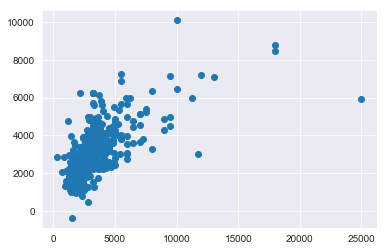

In [1261]:
plt.scatter(y_test,predictions)

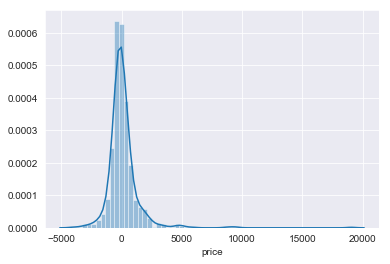

In [1266]:
sns.distplot((y_test-predictions),bins=60)

In [ ]:
# Regression Evaluation Metrics

In [1263]:
from sklearn import metrics

In [1264]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 706.3416508732645
MSE: 1813007.2090725363
RMSE: 1346.4795613274405


In [ ]:
## Modeling No.2
# # treating both 'num_bedrooms' and 'neighborhood_new' as categorical variables

In [1267]:
apts_toronto.columns

Index(['price', 'num_bedrooms', 'sqft', 'neighborhood_new_Alderwood, Toronto',
       'neighborhood_new_Annex, Toronto',
       'neighborhood_new_Banbury-Don Mills, Toronto',
       'neighborhood_new_Bathurst Manor, Toronto',
       'neighborhood_new_Bay Street Corridor, Toronto',
       'neighborhood_new_Bayview Village, Toronto',
       'neighborhood_new_Bedford Park-Nortown, Toronto',
       ...
       'neighborhood_new_Willowdale West, Toronto',
       'neighborhood_new_Willowridge-Martingrove-Richview, Toronto',
       'neighborhood_new_Woburn, Toronto',
       'neighborhood_new_Woodbine Corridor, Toronto',
       'neighborhood_new_Woodbine-Lumsden, Toronto',
       'neighborhood_new_Wychwood, Toronto',
       'neighborhood_new_Yonge-Eglinton, Toronto',
       'neighborhood_new_Yonge-Saint Clair, Toronto',
       'neighborhood_new_York University Heights, Toronto',
       'neighborhood_new_Yorkdale-Glen Park, Toronto'],
      dtype='object', length=118)

In [1268]:
# Convert 'num_bedrooms' column to Categorical Features

apts_toronto = pd.get_dummies(data = apts_toronto, columns = ['num_bedrooms'], drop_first = True)

In [1274]:
# Train Test Split

X_2 = apts_toronto.drop('price',axis=1)
y_2 = apts_toronto['price']

from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, 
                                                    y_2, test_size=0.30, 
                                                    random_state=101)

In [1275]:
# Train the model 

from sklearn.linear_model import LinearRegression
lm_2 = LinearRegression()
lm_2.fit(X_train_2,y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Model Evaluation

In [1276]:
# print the intercept
print(lm_2.intercept_)

222.70173532023728


In [1277]:
coeff_df = pd.DataFrame(lm_2.coef_,X_2.columns,columns=['Coefficient'])
coeff_df

,Coefficient
sqft,2.721375e+00
"neighborhood_new_Alderwood, Toronto",-8.870388e+02
"neighborhood_new_Annex, Toronto",3.855889e+02
"neighborhood_new_Banbury-Don Mills, Toronto",-4.845522e+01
"neighborhood_new_Bathurst Manor, Toronto",-2.625983e+02
"neighborhood_new_Bay Street Corridor, Toronto",7.324986e+02
"neighborhood_new_Bayview Village, Toronto",7.080071e+01
"neighborhood_new_Bedford Park-Nortown, Toronto",-4.145066e+02
"neighborhood_new_Beechborough-Greenbrook, Toronto",-9.498015e+02
"neighborhood_new_Bendale, Toronto",-4.748258e+02


In [ ]:
# Prediction from the model

In [1278]:
predictions_2 = lm_2.predict(X_test_2)

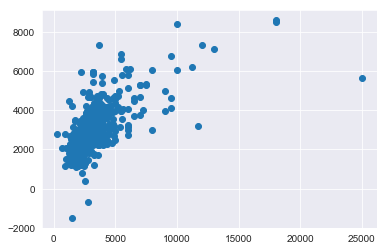

In [1279]:
plt.scatter(y_test_2,predictions_2)

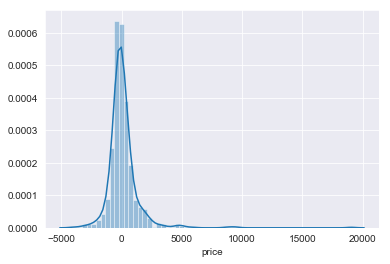

In [1280]:
sns.distplot((y_test-predictions),bins=60)

In [1282]:
# Regression Evaluation Metrics

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test_2, predictions_2))
print('MSE:', metrics.mean_squared_error(y_test_2, predictions_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_2, predictions_2)))

MAE: 704.0226755058104
MSE: 1842702.9117800922
RMSE: 1357.4619375069387
